In [110]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Ignore warnings
warnings.filterwarnings('ignore')

In [111]:
#Load,read and view the datasets
olist_customers=pd.read_csv('olist_customers_dataset.csv')
olist_geolocation=pd.read_csv('olist_geolocation_dataset.csv')
olist_order_items=pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments=pd.read_csv('olist_order_payments_dataset.csv')
olist_order_reviews=pd.read_csv('olist_order_reviews_dataset.csv')
olist_orders=pd.read_csv('olist_orders_dataset.csv')
olist_products=pd.read_csv('olist_products_dataset_translation.csv')
olist_sellers=pd.read_csv('olist_sellers_dataset.csv')

In [112]:
olist_order_items.shape

(112650, 7)

In [113]:
# prompt: drop duplicate order_id in olist_order_items

# Drop duplicate order_id in olist_order_items
olist_order_items = olist_order_items.drop_duplicates(subset=['order_id'])

In [114]:
olist_order_items.shape

(98666, 7)

In [115]:
df1=pd.merge(left=olist_orders, right=olist_order_payments, how='inner', on='order_id')
df2=pd.merge(left=df1, right=olist_customers, how='inner', on='customer_id')
df3=pd.merge(left=df2, right=olist_order_reviews, how='inner', on='order_id')
df4=pd.merge(left=df3, right=olist_order_items, how='inner', on='order_id')
df5=pd.merge(left=df4, right=olist_products, how='inner', on='product_id')
df6=pd.merge(left=df5, right=olist_sellers, how='inner', on='seller_id')

In [116]:
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [117]:
df3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [118]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102863 entries, 0 to 102862
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102863 non-null  object 
 1   customer_id                    102863 non-null  object 
 2   order_status                   102863 non-null  object 
 3   order_purchase_timestamp       102863 non-null  object 
 4   order_approved_at              102849 non-null  object 
 5   order_delivered_carrier_date   101815 non-null  object 
 6   order_delivered_customer_date  100647 non-null  object 
 7   order_estimated_delivery_date  102863 non-null  object 
 8   payment_sequential             102863 non-null  int64  
 9   payment_type                   102863 non-null  object 
 10  payment_installments           102863 non-null  int64  
 11  payment_value                  102863 non-null  float64
 12  customer_unique_id            

In [119]:
#Changing the name of the dataframe
df=df6

# View the data
print("Shape: "+str(df.shape))
print("Size: "+str(df.size))
print("\n")
df.head()

Shape: (102863, 39)
Size: 4011657




,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP


In [120]:
#Check overall info of the dataset
df.info()

print("---------------------------------------------------------------------")
print("The dataframe has:", df.shape[0], "rows and ", df.shape[1], "columns", "Size", df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102863 entries, 0 to 102862
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102863 non-null  object 
 1   customer_id                    102863 non-null  object 
 2   order_status                   102863 non-null  object 
 3   order_purchase_timestamp       102863 non-null  object 
 4   order_approved_at              102849 non-null  object 
 5   order_delivered_carrier_date   101815 non-null  object 
 6   order_delivered_customer_date  100647 non-null  object 
 7   order_estimated_delivery_date  102863 non-null  object 
 8   payment_sequential             102863 non-null  int64  
 9   payment_type                   102863 non-null  object 
 10  payment_installments           102863 non-null  int64  
 11  payment_value                  102863 non-null  float64
 12  customer_unique_id            

In [121]:
#Check data types before cleaning
display(df.dtypes.value_counts())

object     23
float64    10
int64       6
Name: count, dtype: int64

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,102863.0,1.092891,0.709484,1.00,1.00,1.00,1.00,29.00
payment_installments,102863.0,2.855818,2.687221,0.00,1.00,1.00,4.00,24.00
payment_value,102863.0,153.358170,214.541042,0.00,56.78,99.98,171.44,13664.08
customer_zip_code_prefix,102863.0,35107.835850,29770.463479,1003.00,11360.00,24360.00,58701.00,99990.00
review_score,102863.0,4.102457,1.333061,1.00,4.00,5.00,5.00,5.00
order_item_id,102863.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
price,102863.0,125.727765,190.593839,0.85,41.30,79.00,139.90,6735.00
freight_value,102863.0,20.244684,15.944237,0.00,13.32,16.39,21.26,409.68
product_name_lenght,101362.0,48.846392,10.002298,5.00,42.00,52.00,57.00,76.00
product_description_lenght,101362.0,792.336418,655.490164,4.00,348.00,605.00,995.00,3992.00


In [123]:
df.describe(include=['object']).T

,count,unique,top,freq
order_id,102863,97916,fa65dad1b0e818e3ccc5cb0e39231352,29
customer_id,102863,97916,9af2372a1e49340278e7c1ef8d749f34,29
order_status,102863,7,delivered,100649
order_purchase_timestamp,102863,97370,2017-04-20 12:45:34,29
order_approved_at,102849,89533,2017-04-22 09:10:13,29
order_delivered_carrier_date,101815,80449,2018-05-09 15:48:00,47
order_delivered_customer_date,100647,95021,2017-06-22 16:04:46,26
order_estimated_delivery_date,102863,449,2017-12-20 00:00:00,559
payment_type,102863,4,credit_card,76094
customer_unique_id,102863,94720,9a736b248f67d166d2fbb006bcb877c3,33


In [124]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 102863 │ │ string      │ 23    │                                                          │
│ │ Number of columns │ 39     │ │ float64     │ 10    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 6     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA    ┃ NA %  ┃ mean   ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ payment_sequential     │     0 │     0 │  1.093 │  0.7095 │     1 │     1 │     1 │     1 │    29 │   ▇    │  │
│ │ payment_installments   │     0 │     0 │  2.856 │   2.687 │     0 │     1 │     1 │     4 │    24 │  ▇▂▁   │  │
│ │ payment_value          │     0 │     0 │  153.4 │   214.5 │     0 │ 56.78 │ 99.98 │ 171.4 │ 13660 │   ▇    │  │
│ │ customer_zip_code_pref │     0 │     0 │  35110 │   29770 │  1003 │ 11360 │ 24360 │ 58700 │ 99990 │ ▇▅▂▁▂▃ │  │
│ │ ix                     │       │       │        │         │       │       │       │       │       │        │  │
│ │ review_score           │     0 │     0 │  4.102 │   1.333 │     1 │     4 │     5 │     5 │     5 │ ▂  ▁▃▇ │  │
│ │ order_item_id          │     0 │     0 │      1 │       0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ price                  │     0 │     0 │  125.7 │   190.6 │  0.85 │  41.3 │    79 │ 139.9 │  6735 │   ▇    │  │
│ │ freight_value          │     0 │     0 │  20.24 │   15.94 │     0 │ 13.32 │ 16.39 │ 21.26 │ 409.7 │   ▇    │  │
│ │ product_name_lenght    │  1501 │  1.46 │  48.85 │      10 │     5 │    42 │    52 │    57 │    76 │  ▁▃▅▇  │  │
│ │ product_description_le │  1501 │  1.46 │  792.3 │   655.5 │     4 │   348 │   605 │   995 │  3992 │  ▇▅▁   │  │
│ │ nght                   │       │       │        │         │       │       │       │       │       │        │  │
│ │ product_photos_qty     │  1501 │  1.46 │  2.245 │   1.743 │     1 │     1 │     2 │     3 │    20 │   ▇▁   │  │
│ │ product_weight_g       │    18 │  0.02 │   2119 │    3799 │     0 │   300 │   700 │  1813 │ 40420 │   ▇▁   │  │
│ │ product_length_cm      │    18 │  0.02 │   30.2 │   16.17 │     7 │    18 │    25 │    38 │   105 │  ▇▅▃▁  │  │
│ │ product_height_cm      │    18 │  0.02 │  16.51 │   13.34 │     2 │     8 │    13 │    20 │   105 │   ▇▃   │  │
│ │ product_width_cm       │    18 │  0.02 │  23.09 │   11.77 │     6 │    15 │    20 │    30 │   118 │  ▇▃▁   │  │
│ │ seller_zip_code_prefix │     0 │     0 │  24620 │   27680 │  1001 │  6440 │ 13600 │ 29160 │ 99730 │ ▇▁▁ ▁▁ │  │
│ └────────────────────────┴───────┴───────┴────────┴─────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA         ┃ NA

In [125]:
#Check for missing values
df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1048
order_delivered_customer_date     2216
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             90964
review_comment_message           60611
review_creation_date                 0
review_answer_timestamp              0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date      

## Data Cleaning Strategy:
**1. Deleting;**
* The number of missing values for ***order_approved_at-15,***,is small and wont significantly impact our analysis,so we can consider removing these rows with the missing values.
* ***review_comment_title has 103,437,order_delivered_carrier_date- 1235, order_delivered_customer_date- 2471 and review_comment_message has 67650 missing values***- as these dont seem as important, we can consider dropping these 2 columns
* Other columns that we shall also drop that do not seem significant to affec our analysis include; ***payment_sequential, payment_type,payment_installments,review_creation_date,review_answer_timestamp,shipping_limit_date,product_name_lenght,product_description_lenght***

**2. Imputation;**
* We can impute missing values using carious techniques depending on the data type.
* For numeric columns ***product_photos_qty,product_weight_g, product_length_cm, product_height_cm, product_width_cm***, we can fill missingn values with their mean, median or a specific value that makes sense in the context.
* For categorical columns, like ***product_description/category***, we can use the mode to fill missing values.

In [126]:
#Dropping the columns listed above
df.drop(['order_approved_at','review_comment_title','order_delivered_carrier_date','order_delivered_customer_date','review_comment_message','payment_sequential','payment_type','payment_installments','review_creation_date','review_answer_timestamp','shipping_limit_date','seller_zip_code_prefix','product_name_lenght','product_description_lenght'],axis=1, inplace=True)

In [127]:
#Using imputation- mean on the numerical columns
df['product_photos_qty'].fillna(df['product_photos_qty'].mean(),inplace=True)

df['product_weight_g'].fillna(df['product_weight_g'].mean(),inplace=True)

df['product_length_cm'].fillna(df['product_length_cm'].mean(),inplace=True)

df['product_height_cm'].fillna(df['product_height_cm'].mean(),inplace=True)

df['product_width_cm'].fillna(df['product_width_cm'].mean(),inplace=True)

In [128]:
#Using imputation on the categorical column by introducing 'unknown' category
df['product_category'].fillna('Unknown', inplace=True)

In [129]:
#Check for missing values again to check
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_id                        0
review_score                     0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_category                 0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_city                      0
seller_state                     0
dtype: int64

In [130]:
#Check for duplicates
df.duplicated().sum()

599

In [131]:
# prompt: Check which all columns have duplicate values in df

duplicate_columns = []
for col in df.columns:
  if df[col].duplicated().any():
    duplicate_columns.append(col)

print("Columns with duplicate values:")
duplicate_columns

Columns with duplicate values:


['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_estimated_delivery_date',
 'payment_value',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'review_id',
 'review_score',
 'order_item_id',
 'product_id',
 'seller_id',
 'price',
 'freight_value',
 'product_category',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'seller_city',
 'seller_state']

In [132]:
df.info()

print("---------------------------------------------------------------------")
print("The dataframe has:", df.shape[0], "rows and ", df.shape[1], "columns", "Size", df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102863 entries, 0 to 102862
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102863 non-null  object 
 1   customer_id                    102863 non-null  object 
 2   order_status                   102863 non-null  object 
 3   order_purchase_timestamp       102863 non-null  object 
 4   order_estimated_delivery_date  102863 non-null  object 
 5   payment_value                  102863 non-null  float64
 6   customer_unique_id             102863 non-null  object 
 7   customer_zip_code_prefix       102863 non-null  int64  
 8   customer_city                  102863 non-null  object 
 9   customer_state                 102863 non-null  object 
 10  review_id                      102863 non-null  object 
 11  review_score                   102863 non-null  int64  
 12  order_item_id                 

In [133]:
#Convert the date columns to date.time
df.order_purchase_timestamp = pd.to_datetime(df.order_purchase_timestamp)
df.order_estimated_delivery_date = pd.to_datetime(df.order_estimated_delivery_date)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102863 entries, 0 to 102862
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102863 non-null  object        
 1   customer_id                    102863 non-null  object        
 2   order_status                   102863 non-null  object        
 3   order_purchase_timestamp       102863 non-null  datetime64[ns]
 4   order_estimated_delivery_date  102863 non-null  datetime64[ns]
 5   payment_value                  102863 non-null  float64       
 6   customer_unique_id             102863 non-null  object        
 7   customer_zip_code_prefix       102863 non-null  int64         
 8   customer_city                  102863 non-null  object        
 9   customer_state                 102863 non-null  object        
 10  review_id                      102863 non-null  object        
 11  

In [135]:
#Check data types
display(df.dtypes.value_counts())

object            12
float64            8
int64              3
datetime64[ns]     2
Name: count, dtype: int64

In [136]:
#Rename some columns
df = df.rename(columns={'order_item_id':'order_item_quantity'})
df = df.rename(columns={'order_purchase_timestamp': 'order_purchased_at'})
df = df.rename(columns={'payment_value': 'total_value'})

## NumericalColumns/Feature:

In [137]:
#Numerical columns
num_col = df[['total_value','review_score','order_item_quantity','freight_value','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]
num_col.head()

,total_value,review_score,order_item_quantity,freight_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,18.12,4,1,8.72,4.0,500.0,19.0,8.0,13.0
1,2.00,4,1,8.72,4.0,500.0,19.0,8.0,13.0
2,18.59,4,1,8.72,4.0,500.0,19.0,8.0,13.0
3,141.46,4,1,22.76,1.0,400.0,19.0,13.0,19.0
4,179.12,5,1,19.22,1.0,420.0,24.0,19.0,21.0


In [140]:
#Check for Skewness and Kurtosis
from scipy.stats import skew, kurtosis

print(skew(num_col,axis = 0, bias = True))

[ 9.20347715 -1.39100073         nan  5.50000109  1.87366054  3.59525875
  1.75649911  2.25280404  1.70507802]


In [141]:
print(kurtosis(num_col,axis = 0, bias = True))

[245.98350369   0.6059495           nan  56.23887752   4.67733677
  16.15836454   3.72499613   7.43088082   4.51143043]


### Observations:
#### Skewness:;
Skewness is a measure of symmetry or asymmetry of data distribution. Skewness quantifies how much the distribution of values in a dataset deviates from a normal distribution. A skewness value of 0 indicates a perfectly symmetrical distribution.

Positive skewness indicates a distribution with a longer tail on the right, while negative skewness indicates a distribution with a longer tail on the left.

#### Kurtosis;
Kurtosis measures whether the data is heavy or light tailed in a distribution. Kurtosis measures the "tailedness" of the distribution, i.e., how much the tails of a distribution differ from the normal distribution.

Positive kurtosis (leptokurtic) indicates heavier tails, meaning more outliers.
Negative kurtosis (platykurtic) indicates lighter tails, meaning fewer outliers.
A kurtosis value close to 0 typically represents a normal distribution (mesokurtic).
Kurtosis Interpretation:

Kurtosis = 3: A normal distribution (mesokurtic).
Kurtosis > 3: Heavier tails (leptokurtic), indicating more extreme values or outliers.
Kurtosis < 3: Lighter tails (platykurtic), indicating fewer extreme values.


**From the above analysis;**
* Most of the distributions are right-skewed, indicating that your data has many low values with some large outliers.

** Total_value (14.2449) and order_item_quantity (7.1819) are positively skewed (right-skewed) as they have values greater than 1.

* The majority of the data has high kurtosis, indicating many of the distributions contain outliers.

** Total_value (521.6884) and order_item_quantity (93.2041) are extremely high kurrtosis values with pronounced peaks.

* We will transform the above values/variables to normal distributions using log transformation

In [142]:
#Dealing with skewed data- Transformation
num_col['total_value']=np.log1p(num_col['total_value'])
num_col['total_value'].skew()

-0.17194040965640076

In [143]:
num_col['order_item_quantity']=np.log1p(num_col['order_item_quantity'])
num_col['order_item_quantity'].skew()

0.0

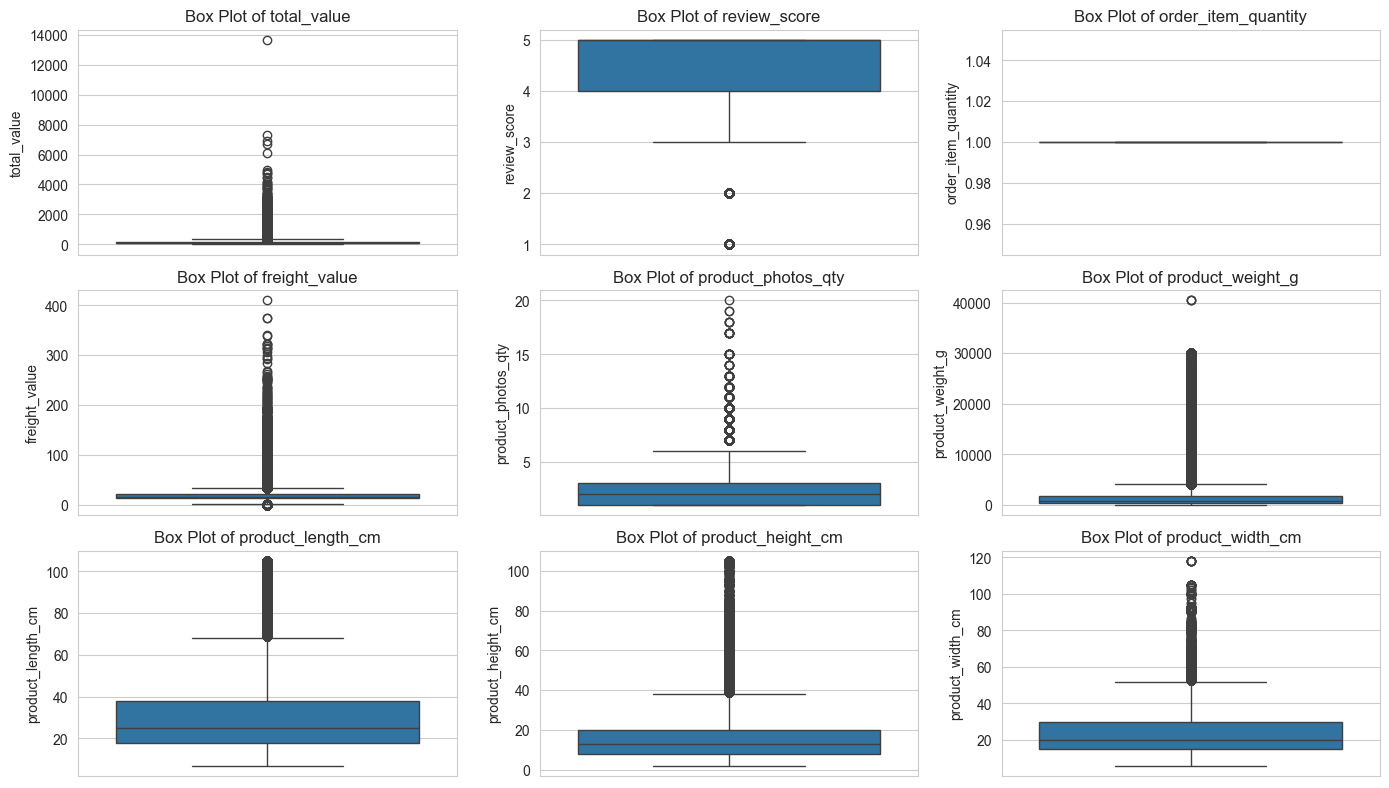

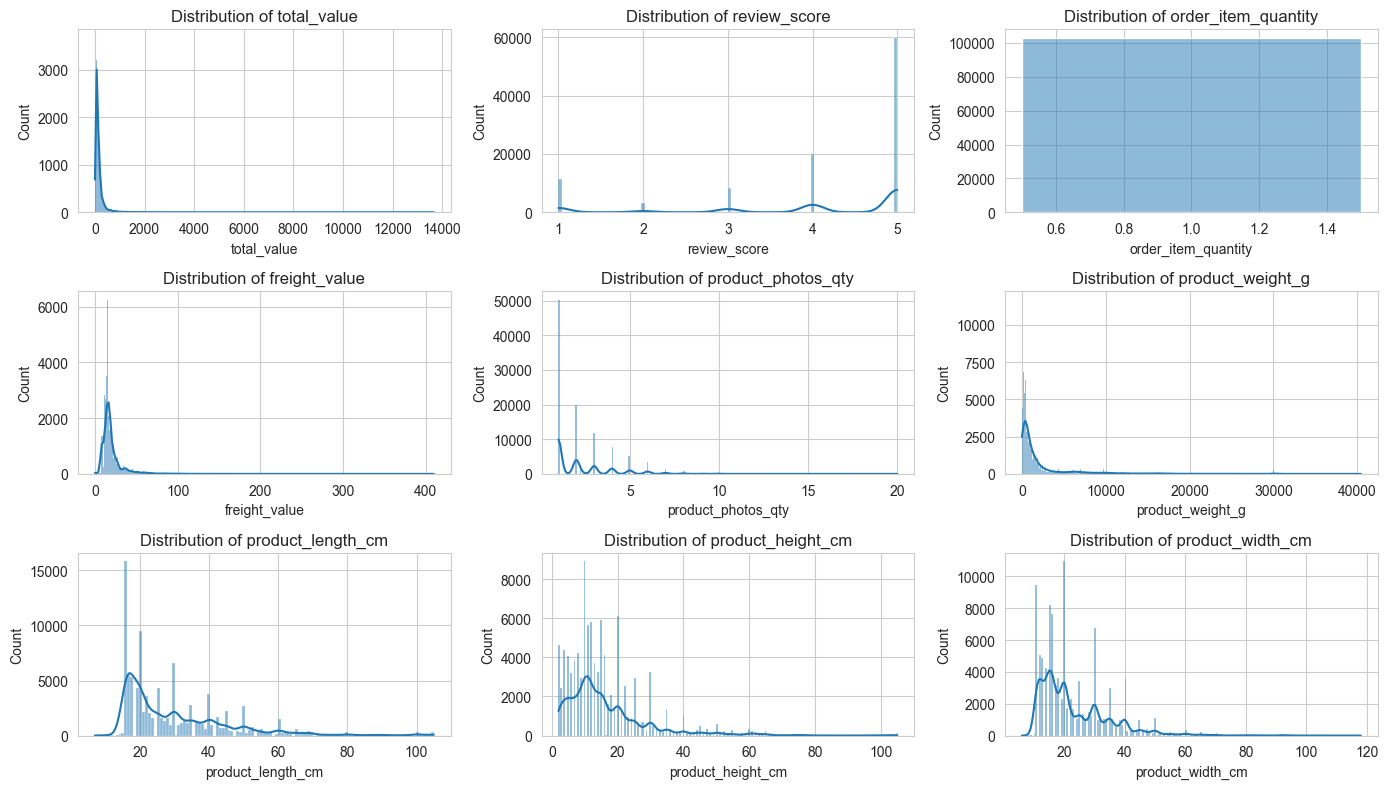

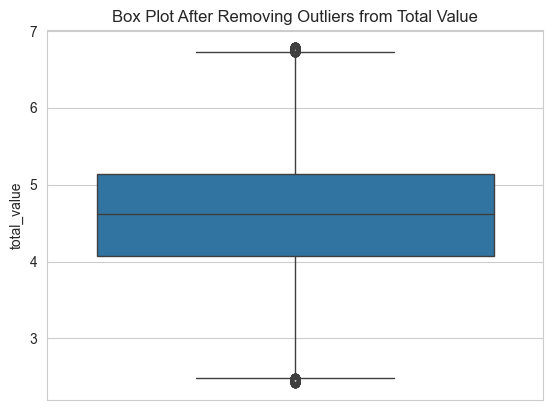

In [144]:
#Exploring Feature Distributions and Outliers
# Box plots for numerical features to identify outliers
plt.figure(figsize=(14, 8))

for i, col in enumerate(num_col, 1):
    plt.subplot(3,3, i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Distribution plots (histograms with KDE) for numerical features
plt.figure(figsize=(14, 8))
for i, col in enumerate(num_col, 1):
    plt.subplot(3,3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Outlier Detection using IQR
def detect_outliers(df, col):
    Q1 = num_col[col].quantile(0.25)
    Q3 = num_col[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return num_col[(num_col[col] >= lower_bound) & (num_col[col] <= upper_bound)]

# Example: Removing outliers for 'payment_value'
df_cleaned = detect_outliers(num_col, 'total_value')

# Plot box plot for cleaned data
sns.boxplot(df_cleaned['total_value'])
plt.title('Box Plot After Removing Outliers from Total Value')
plt.show()


Checking the distribution of the numerical columns helps us determine how the dataset is distributed. From the above analysis, we see that;
.............................

## Categorical columns/features

In [145]:
cat_col=df[['order_id','customer_id','order_status','customer_unique_id','customer_city','customer_state','review_id','product_id', 'seller_id', 'product_category', 'seller_city', 'seller_state']]
cat_col.head()

,order_id,customer_id,order_status,customer_unique_id,customer_city,customer_state,review_id,product_id,seller_id,product_category,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,household_utilities,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,household_utilities,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,household_utilities,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,af07308b275d755c9edb36a90c618231,barreiras,BA,8d5266042046a06655c8db133d120ba5,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,perfumery,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,automobile,guariba,SP


# EXPLORATORY DATA ANALYSIS (EDA):

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102863 entries, 0 to 102862
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102863 non-null  object        
 1   customer_id                    102863 non-null  object        
 2   order_status                   102863 non-null  object        
 3   order_purchased_at             102863 non-null  datetime64[ns]
 4   order_estimated_delivery_date  102863 non-null  datetime64[ns]
 5   total_value                    102863 non-null  float64       
 6   customer_unique_id             102863 non-null  object        
 7   customer_zip_code_prefix       102863 non-null  int64         
 8   customer_city                  102863 non-null  object        
 9   customer_state                 102863 non-null  object        
 10  review_id                      102863 non-null  object        
 11  

In [147]:
#Checking the Unique Products and number available in Product Category
print("Unique_Products: "+str(df['product_category'].unique()))

print("\n")

print("Number of Unique_Products: "+str(df['product_category'].nunique()))

Unique_Products: ['household_utilities' 'perfumery' 'automobile' 'pet_shop' 'stationery'
 'Unknown' 'furniture_decor' 'office_furniture' 'garden_tools'
 'computers_accessories' 'bed_bath_table' 'toys' 'telephony'
 'health_beauty' 'electronics' 'baby' 'cool_stuff' 'watches_gifts'
 'air_conditioning' 'sport_leisure' 'books_general_interest'
 'construction_tools_construction' 'electrical_appliances' 'food'
 'fashion_underwear_and_beach_fashion' 'christmas_supplies'
 'fashion_bag_accesories' 'musical_instruments' 'luggage_accessories'
 'construction_tools_lights' 'books_technical' 'appliances' 'market_place'
 'agro_industry_and_commerce' 'party_supplies ' 'home_confort'
 'cds_dvds_music' 'industry_commerce_and_business' 'consoles_games'
 'furniture_bedroom' 'construction_tools_safety' 'fixed_telephony'
 'beverages' 'kitchen_dining_laundry_garden_furniture' 'fashion_shoes'
 'home_construction' 'audio' 'appliances_2' 'fashion_male_clothing'
 'cine_photo' 'furniture_living_room' 'art' 'constr

### 1. Analysis of Product Category

product_category
bed_bath_table           9914
health_beauty            9064
sport_leisure            7952
computers_accessories    6903
furniture_decor          6701
household_utilities      6140
watches_gifts            5770
telephony                4319
automobile               4007
toys                     3981
cool_stuff               3758
garden_tools             3673
perfumery                3299
baby                     2945
electronics              2594
Name: count, dtype: int64


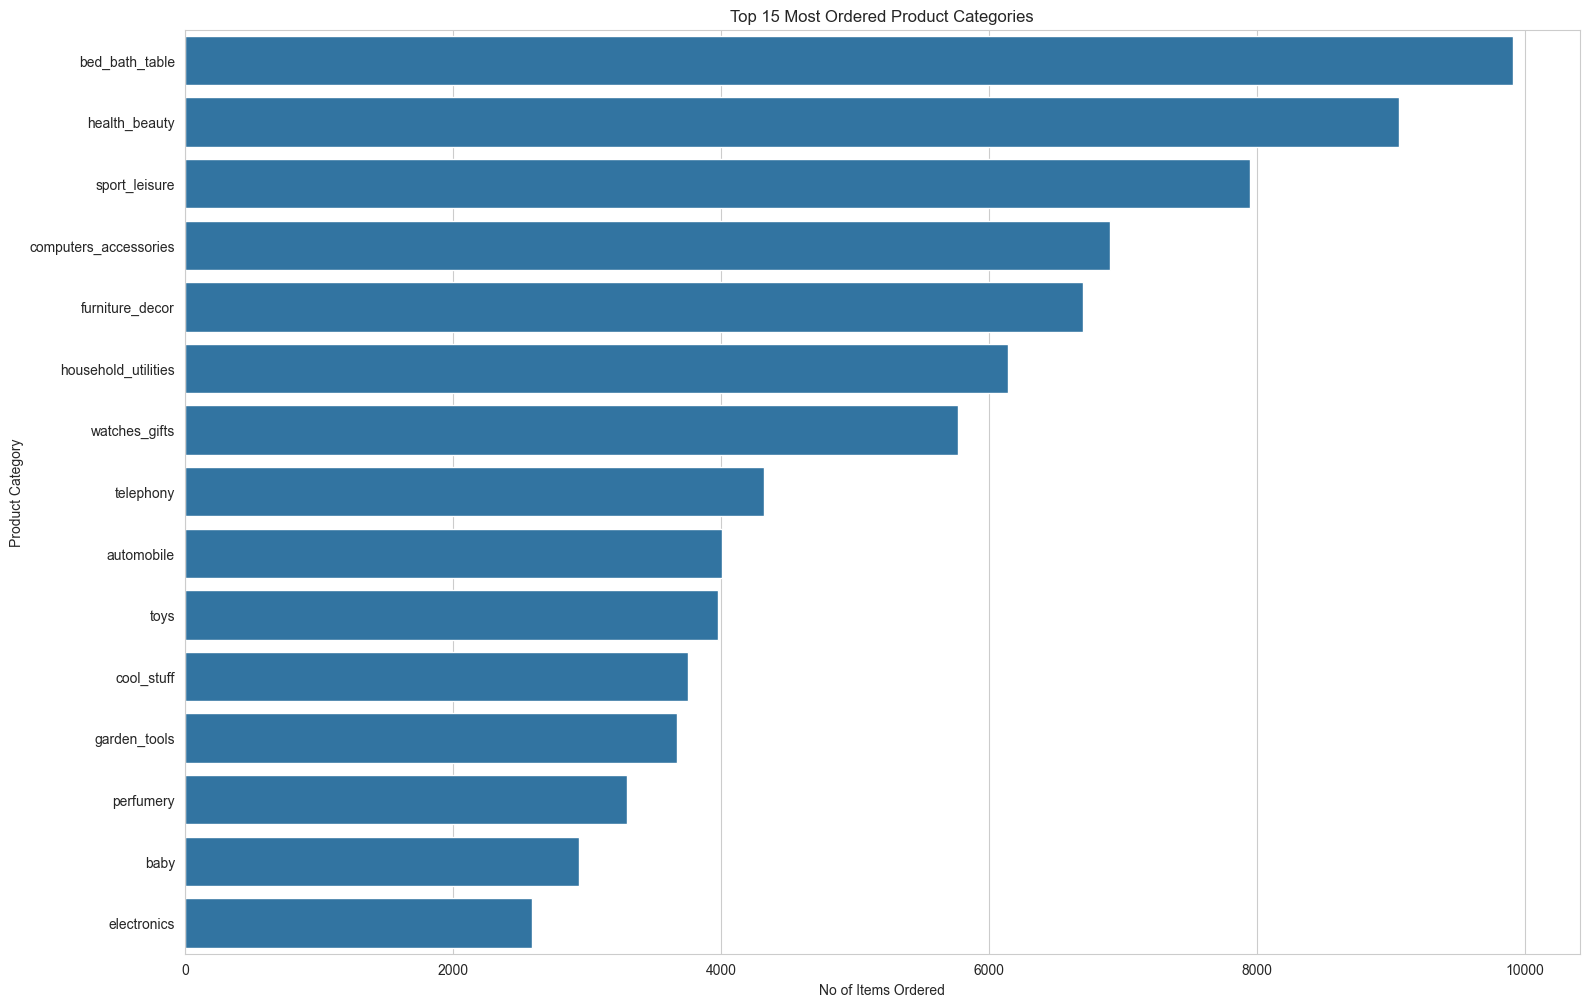

In [148]:
#Checking top 15 most ordered product categories
top_15_products= df['product_category'].value_counts().head(15)
print(top_15_products)

#plot the data
plt.figure(figsize=(18,12))
sns.barplot(x=top_15_products.values, y=top_15_products.index)
plt.xlabel('No of Items Ordered')
plt.ylabel('Product Category')
plt.title('Top 15 Most Ordered Product Categories')
plt.show()

Top 5 Selling Products by Total Sales Value:
 product_category
health_beauty            1433180.10
watches_gifts            1295201.34
bed_bath_table           1244000.22
sport_leisure            1156347.76
computers_accessories    1060540.57
Name: total_value, dtype: float64


Text(0.5, 1.0, 'Top 5 Product Category by Total Sales Value')

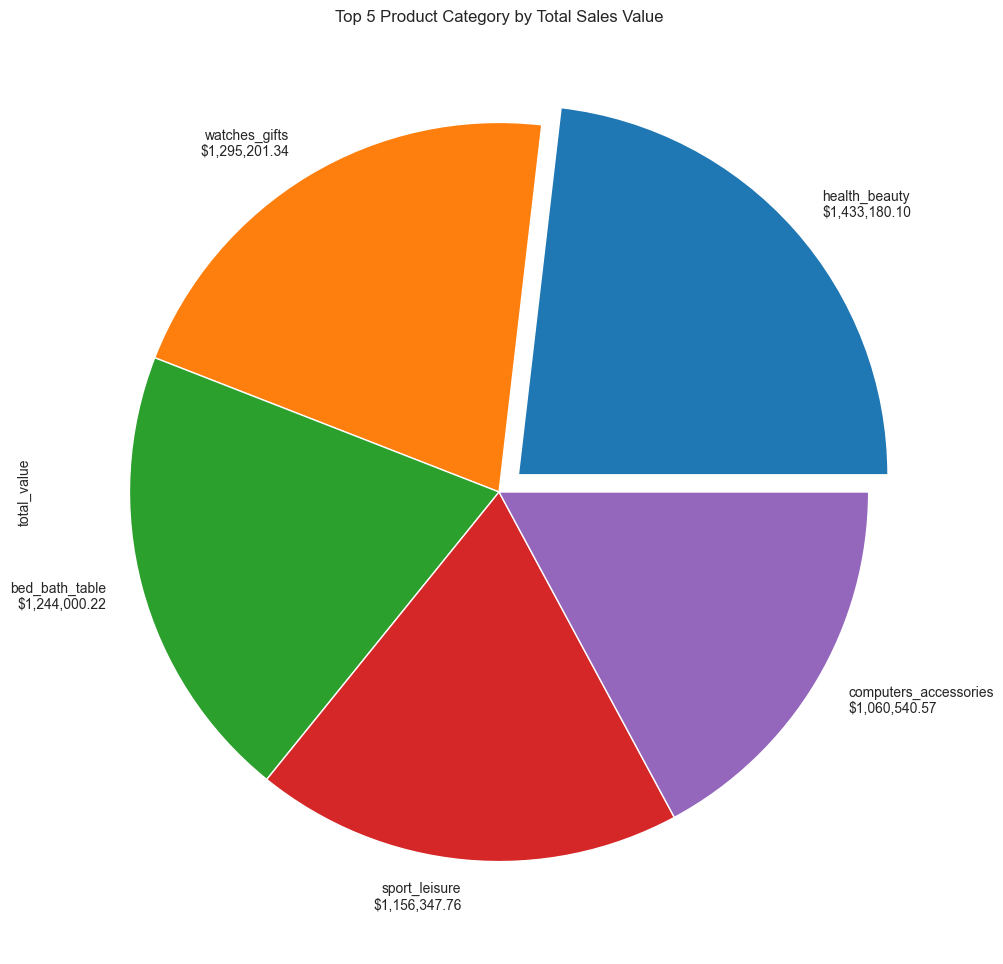

In [149]:
#Top 5 product category by Sales Value
top_5_totalvalue = df.groupby('product_category')['total_value'].sum().sort_values(ascending=False).head()
print("Top 5 Selling Products by Total Sales Value:\n", top_5_totalvalue)


#Creating a pie chart for Top Sales value for the Top 15 Products
# Create labels with product category and sales value
labels = [f"{category}\n${value:,.2f}" for category, value in top_5_totalvalue.items()]

df.groupby('product_category')['total_value'].sum().sort_values(ascending=False).head().plot(kind='pie',
                                                           figsize=(18,12),
                                                           explode=[0.07,0,0,0,0],
                                                           labels=labels
                                                           )
plt.title('Top 5 Product Category by Total Sales Value')

### 2. Analysis by specific Product_ID

In [150]:
#Grouping product ID with the total value to get the cost value
top_15_totalvalue_ = df.groupby('product_id')['total_value'].sum().sort_values(ascending=False).head(15)

#Create a dataframe for top_15_totalvalue_df
top_15_totalvalue_df = top_15_totalvalue_.reset_index()

#merge the top product ID, total value with product category
top_15products_with_category = top_15_totalvalue_df.merge(df[['product_id', 'product_category']].drop_duplicates(),
                                                  on='product_id',
                                                  how='left')

#print the result
print("Top 15 Selling Products by Total Sales Value with Category:\n", top_15products_with_category)

Top 15 Selling Products by Total Sales Value with Category:
                           product_id  total_value       product_category
0   bb50f2e236e5eea0100680137654686c     68392.39          health_beauty
1   d1c427060a0f73f6b889a5c7c61f2ac4     60615.34  computers_accessories
2   6cdd53843498f92890544667809f1595     58528.14          health_beauty
3   99a4788cb24856965c36a24e339b6058     50446.68         bed_bath_table
4   d6160fb7873f184099d9bc95e30376af     50326.18              computers
5   3dd2a17168ec895c781a9191c1e95ad7     47717.30  computers_accessories
6   aca2eb7d00ea1a7b8ebd4e68314663af     44380.12        furniture_decor
7   5f504b3a1c75b73d6151be81eb05bdc9     40989.84             cool_stuff
8   53b36df67ebb7c41585e8d54d6772e08     39423.37          watches_gifts
9   25c38557cf793876c5abdd5931f922db     38211.77                   baby
10  422879e10f46682990de24d770e7f83d     35453.25           garden_tools
11  e0d64dcfaa3b6db5c54ca298ae101d05     34604.72          watc

In [151]:
# Group by product_category and product_id, sum the total_value, and sort by total_value within each category
grouped = (
    top_15products_with_category.groupby(['product_category', 'product_id'])['total_value']
    .max()
    .reset_index()
    .sort_values(['product_category', 'total_value'], ascending=[True, False]))

# Display the result
print(grouped)

         product_category                        product_id  total_value
0                    baby  25c38557cf793876c5abdd5931f922db     38211.77
1          bed_bath_table  99a4788cb24856965c36a24e339b6058     50446.68
2          bed_bath_table  f1c7f353075ce59d8a6f3cf58f419c9c     33012.73
3               computers  d6160fb7873f184099d9bc95e30376af     50326.18
5   computers_accessories  d1c427060a0f73f6b889a5c7c61f2ac4     60615.34
4   computers_accessories  3dd2a17168ec895c781a9191c1e95ad7     47717.30
6              cool_stuff  5f504b3a1c75b73d6151be81eb05bdc9     40989.84
7         furniture_decor  aca2eb7d00ea1a7b8ebd4e68314663af     44380.12
8            garden_tools  422879e10f46682990de24d770e7f83d     35453.25
10          health_beauty  bb50f2e236e5eea0100680137654686c     68392.39
9           health_beauty  6cdd53843498f92890544667809f1595     58528.14
11          watches_gifts  53b36df67ebb7c41585e8d54d6772e08     39423.37
14          watches_gifts  e0d64dcfaa3b6db5c54ca298

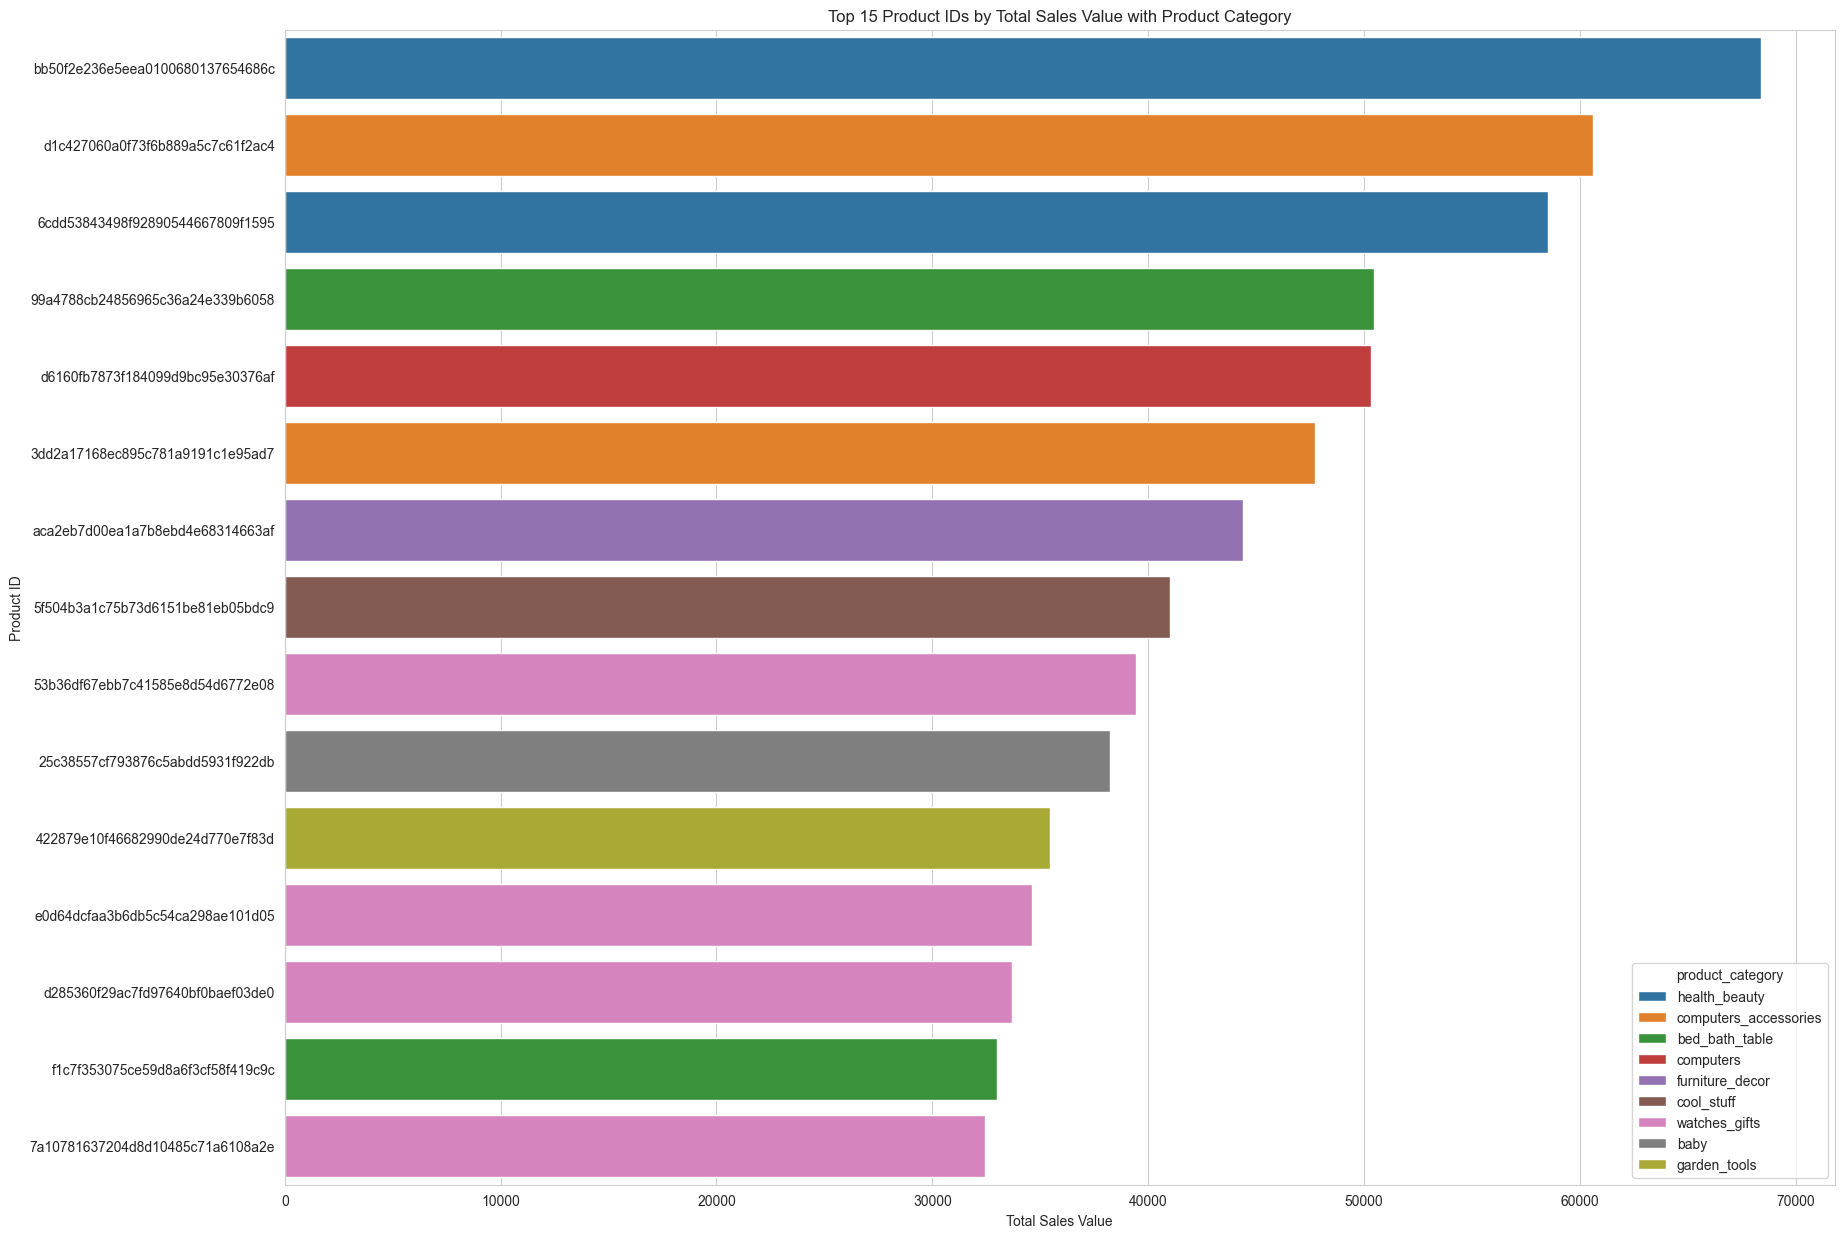

In [152]:
plt.figure(figsize=(20, 15))
sns.barplot(data=top_15products_with_category, y='product_id', x='total_value', hue='product_category')
plt.xlabel('Total Sales Value')
plt.ylabel('Product ID')
plt.title('Top 15 Product IDs by Total Sales Value with Product Category')
plt.show()

### 3. Analysis of Orders and Price over the years

#### Mean Price of Orders per month and year

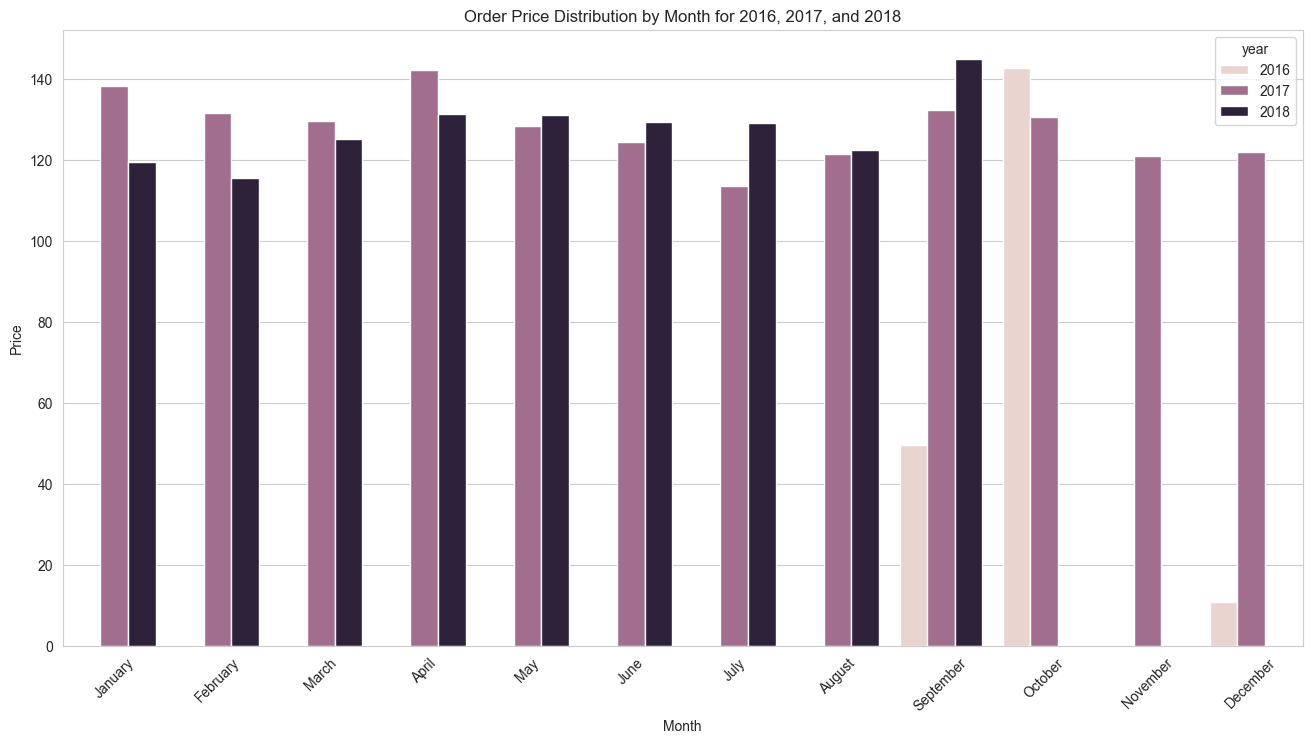

In [153]:
# Extract year and month separately
df['year'] = df['order_purchased_at'].dt.year
df['month'] = df['order_purchased_at'].dt.strftime('%B')

plt.figure(figsize=(16, 8))
sns.barplot(data=df[df['year'].isin([2016, 2017, 2018])], x='month', y='price', hue='year', ci=None, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])

# Label and format
plt.xticks(rotation=45)
plt.title('Order Price Distribution by Month for 2016, 2017, and 2018')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

#### Number of Orders per month for each year

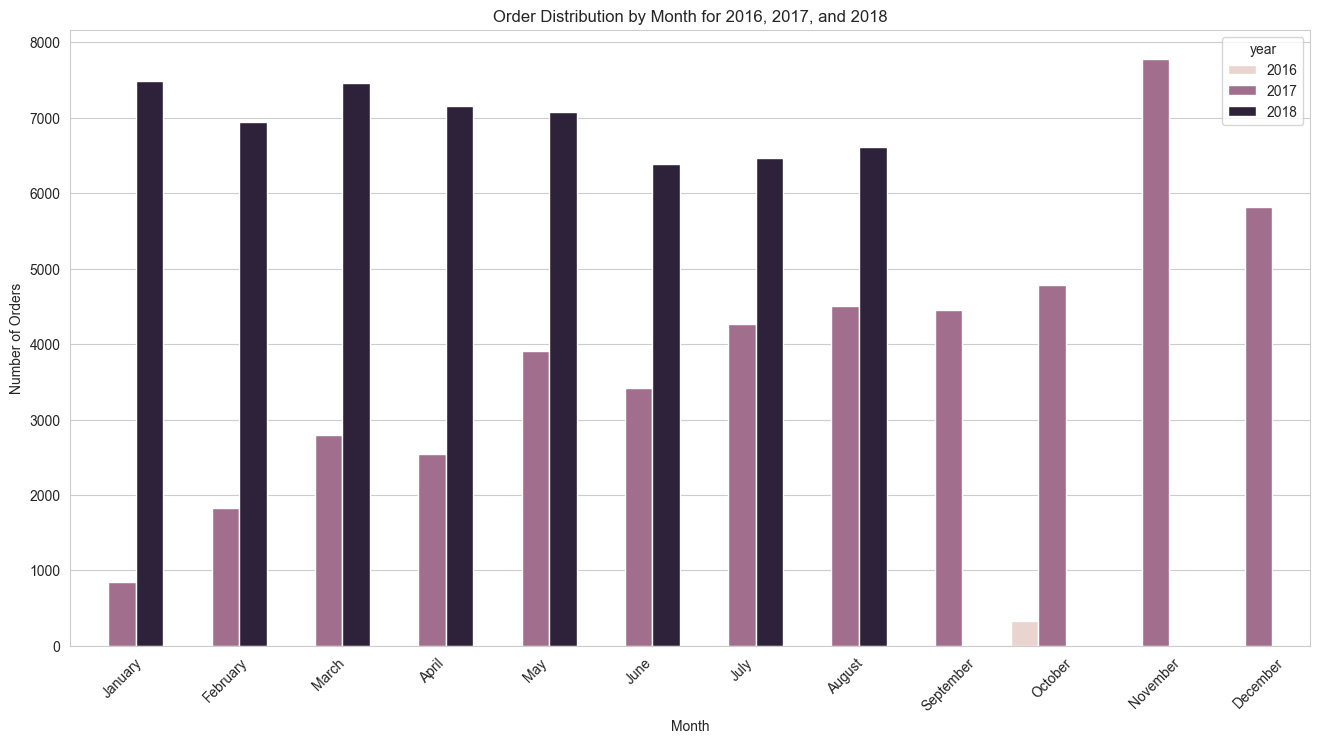

In [154]:
# Extract year and month name separately
df['year'] = df['order_purchased_at'].dt.year
df['month'] = df['order_purchased_at'].dt.strftime('%B')  # Use '%b' for abbreviated month names

# Create a countplot
plt.figure(figsize=(16, 8))
sns.countplot(data=df[df['year'].isin([2016, 2017, 2018])], x='month', hue='year', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])

# Label and format
plt.xticks(rotation=45)
plt.title('Order Distribution by Month for 2016, 2017, and 2018')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

### Total value(revenue) per year

year
2016      56336.36
2017    7114986.57
2018    8603558.47
Name: total_value, dtype: float64


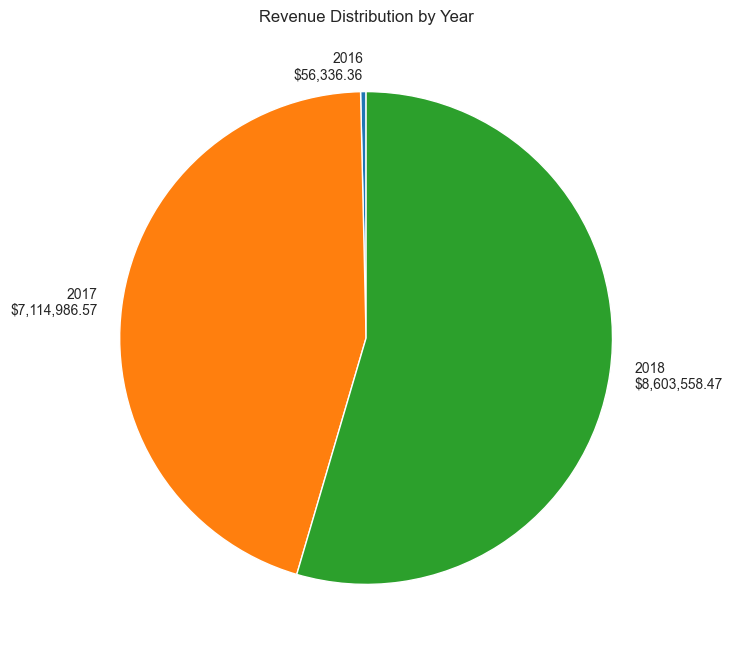

In [155]:
# Extract the year from the purchase timestamp
df['year'] = df['order_purchased_at'].dt.year

# Calculate total order price per year
yearly_revenue = df.groupby('year')['total_value'].sum()
print(yearly_revenue)

labels = [f"{year}\n${value:,.2f}" for year, value in yearly_revenue.items()]

plt.figure(figsize=(8, 8))
plt.pie(yearly_revenue, labels=labels, startangle=90)
plt.title('Revenue Distribution by Year')
plt.show()


### Top 5 Product Categories Sales Distribution Over the Years using a Heatmap

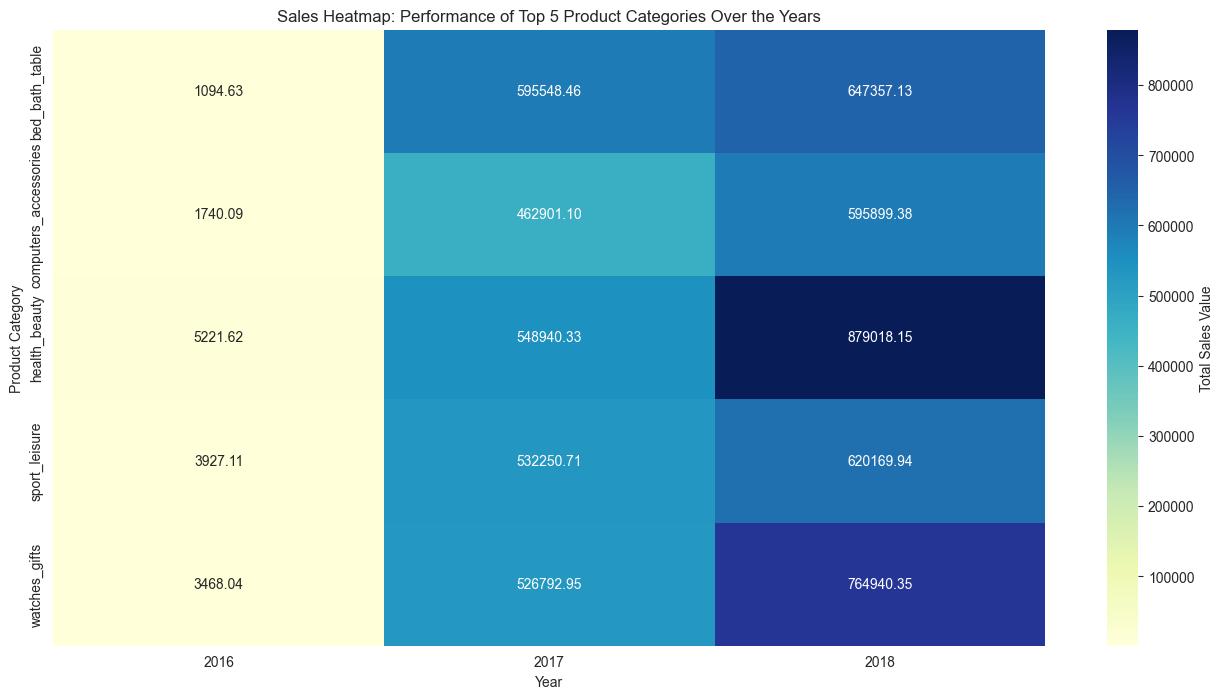

In [156]:
top_5_categories = top_5_totalvalue.index

df_top_5 = df[df['product_category'].isin(top_5_categories)]

df_top_5['year'] = df_top_5['order_purchased_at'].dt.year

# Group by year and product category, summing total sales
sales_over_years = df_top_5.groupby(['year', 'product_category'])['total_value'].sum().unstack().reset_index()

# Create a heatmap of sales over time by category
plt.figure(figsize=(16, 8))
sns.heatmap(sales_over_years.set_index('year').T, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Total Sales Value'})

plt.title('Sales Heatmap: Performance of Top 5 Product Categories Over the Years')
plt.xlabel('Year')
plt.ylabel('Product Category')
plt.show()

Top 5 Customer City by Total Sales Value:
 customer_city
sao paulo         2170043.35
rio de janeiro    1141877.05
belo horizonte     415299.63
brasilia           353534.48
curitiba           244694.01
Name: total_value, dtype: float64


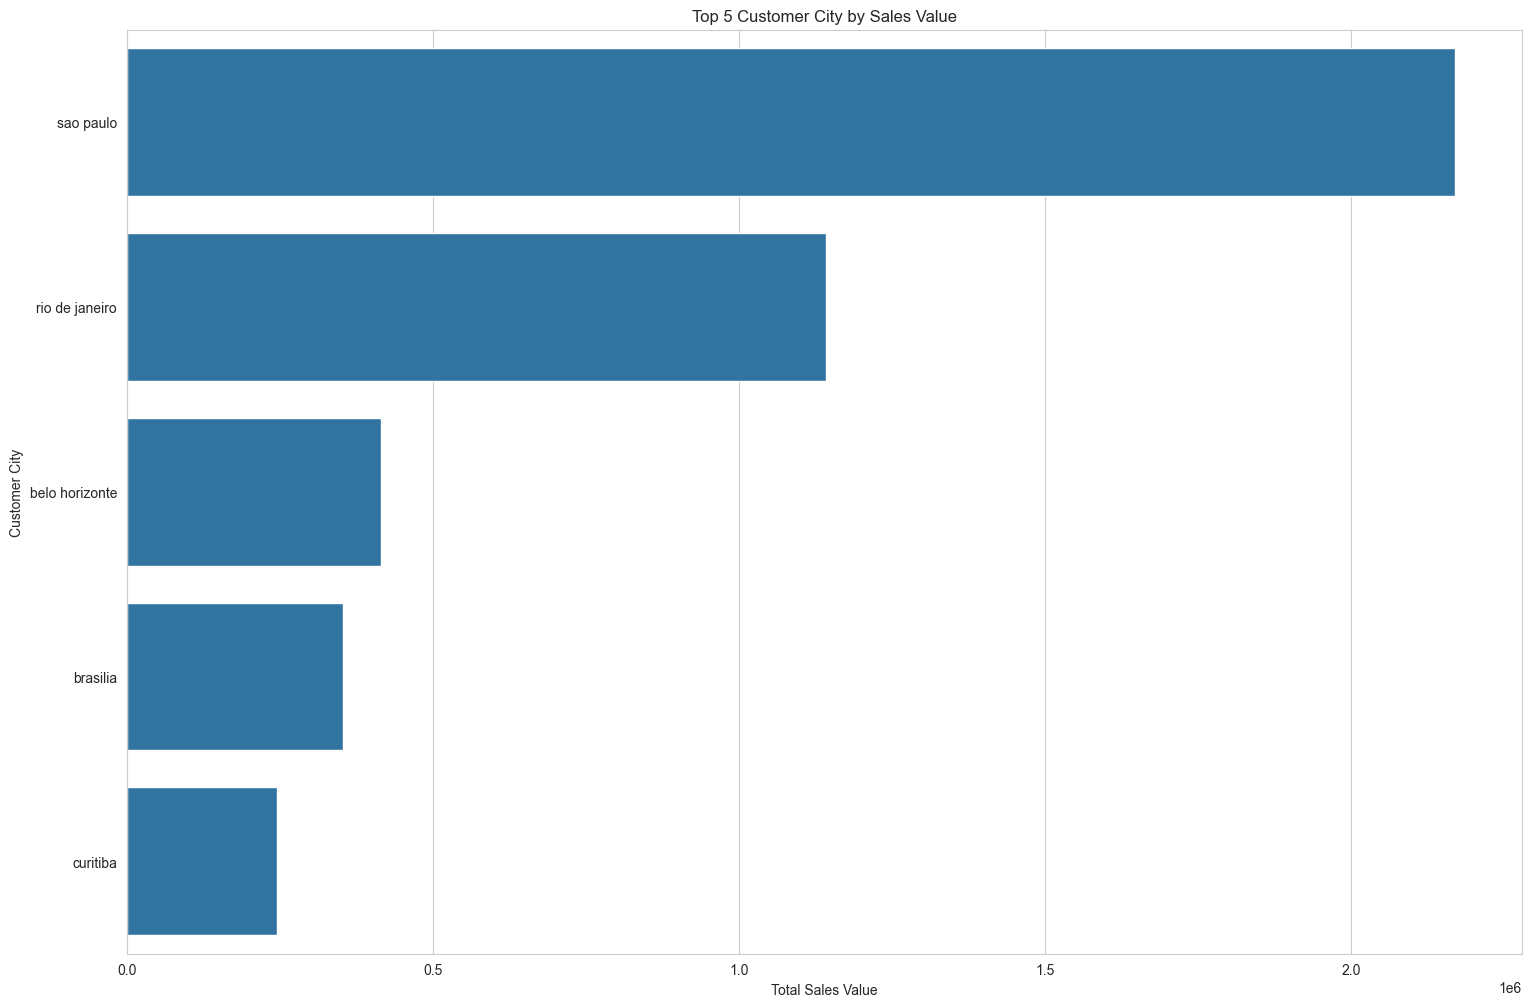

In [157]:
top_5_customercity = df.groupby('customer_city')['total_value'].sum().sort_values(ascending=False).head()
print("Top 5 Customer City by Total Sales Value:\n", top_5_customercity)

#plot the data
plt.figure(figsize=(18,12))
sns.barplot(x=top_5_customercity.values, y=top_5_customercity.index)
plt.xlabel('Total Sales Value')
plt.ylabel('Customer City')
plt.title('Top 5 Customer City by Sales Value')
plt.show()

In [158]:
# prompt: summary statitics of review score column

# Assuming 'df' is your DataFrame
df['review_score'].describe()

count    102863.000000
mean          4.102457
std           1.333061
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

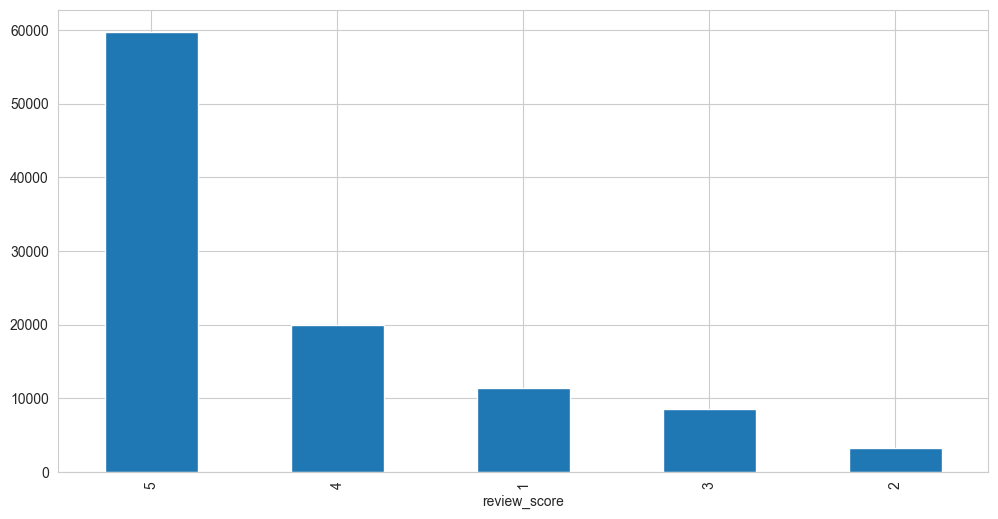

In [170]:
plt.figure(figsize = (12,6))
df['review_score'].value_counts().plot(kind='bar')
plt.show()


The distribution is skewed to the right. Over 50% of the ratings are 5, followed by a little below 20% with 4 star ratings. And the percentages of ratings keep going down until below 10% of the ratings are 2 stars.

In [160]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', df['customer_unique_id'].nunique())
print('Number of unique Customers in Raw data = ', df['customer_id'].nunique())
print('Number of unique Products in Raw data = ', df['product_id'].nunique())

Number of unique USERS in Raw data =  94720
Number of unique Customers in Raw data =  97916
Number of unique Products in Raw data =  31724


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102863 entries, 0 to 102862
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102863 non-null  object        
 1   customer_id                    102863 non-null  object        
 2   order_status                   102863 non-null  object        
 3   order_purchased_at             102863 non-null  datetime64[ns]
 4   order_estimated_delivery_date  102863 non-null  datetime64[ns]
 5   total_value                    102863 non-null  float64       
 6   customer_unique_id             102863 non-null  object        
 7   customer_zip_code_prefix       102863 non-null  int64         
 8   customer_city                  102863 non-null  object        
 9   customer_state                 102863 non-null  object        
 10  review_id                      102863 non-null  object        
 11  

In [173]:
df['order_id'].nunique()

97916

In [183]:
df[df['review_score']==0].size

0

In [182]:
review_prod=df.groupby(['customer_id', 'product_id']).agg(mean_rating=('review_score', 'mean')).reset_index()
print('Total number of unique product orders: ',review_prod.shape[0] )
print('Number of reviews:', review_prod[review_prod['mean_rating']>0].shape[0])

Total number of unique product orders:  97916
Number of reviews: 97916


In [161]:
# Top 10 users based on rating
most_rated = df.groupby('customer_unique_id').size().sort_values(ascending=False)[:10]
most_rated

customer_unique_id
9a736b248f67d166d2fbb006bcb877c3    33
8af7ac63b2efbcbd88e5b11505e8098a    29
569aa12b73b5f7edeaa6f2a01603e381    26
90807fdb59eec2152bc977feeb6e47e7    24
1d2435aa3b858d45c707c9fc25e18779    24
f9ae226291893fda10af7965268fb7f6    23
2524dcec233c3766f2c2b22f69fd65f4    22
6fbc7cdadbb522125f4b27ae9dee4060    19
24f12460aad399ba18f4ed2c2fbab65d    19
8d50f5eadf50201ccdcedfb9e2ac8455    16
dtype: int64

In [ ]:
most_rated[[most_rated.iloc[:,1]>5]].

### Pre-Processing


Selecting Top Product IDs most ordered to subset the data

In [162]:
top_15_products

product_category
bed_bath_table           9914
health_beauty            9064
sport_leisure            7952
computers_accessories    6903
furniture_decor          6701
household_utilities      6140
watches_gifts            5770
telephony                4319
automobile               4007
toys                     3981
cool_stuff               3758
garden_tools             3673
perfumery                3299
baby                     2945
electronics              2594
Name: count, dtype: int64

In [163]:
df_top_prod=df[df.product_category.isin(top_15_products.index)]
df_top_prod

,order_id,customer_id,order_status,order_purchased_at,order_estimated_delivery_date,total_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,...,product_category,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,...,household_utilities,4.0,500.0,19.0,8.0,13.0,maua,SP,2017,October
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,...,household_utilities,4.0,500.0,19.0,8.0,13.0,maua,SP,2017,October
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,...,household_utilities,4.0,500.0,19.0,8.0,13.0,maua,SP,2017,October
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,...,perfumery,1.0,400.0,19.0,13.0,19.0,belo horizonte,SP,2018,July
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,...,automobile,1.0,420.0,24.0,19.0,21.0,guariba,SP,2018,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102857,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-03-22,155.99,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,...,furniture_decor,2.0,2500.0,49.0,13.0,41.0,ibitinga,SP,2017,February
102858,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-28,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,...,health_beauty,1.0,1175.0,22.0,13.0,18.0,braganca paulista,SP,2017,March
102859,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-03-02,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,...,baby,4.0,4950.0,40.0,10.0,40.0,tupa,SP,2018,February
102861,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,...,computers_accessories,1.0,6550.0,20.0,20.0,20.0,ilicinea,MG,2018,January


In [164]:
top_15products_category =df_top_prod.groupby('product_category').agg(Unique_products=('product_id','nunique')).reset_index()

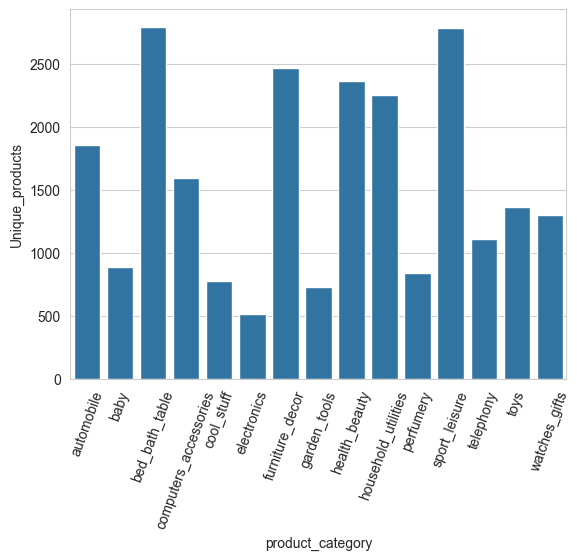

In [165]:
sns.barplot(top_15products_category, x='product_category', y='Unique_products')
plt.xticks(rotation=70)
plt.show()

In [166]:
top_prod_id_grps=df_top_prod.groupby(['product_category', 'product_id']).size().reset_index(name='Size')
top_prod_id_grps.sort_values(by='Size', ascending=False, inplace=True)

In [167]:
top_prod_id_grps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23676 entries, 4462 to 23675
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_category  23676 non-null  object
 1   product_id        23676 non-null  object
 2   Size              23676 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 739.9+ KB


In [378]:
top_prod_id_grps.head(10)

,product_category,product_id,Size
4462,bed_bath_table,99a4788cb24856965c36a24e339b6058,462
10114,furniture_decor,aca2eb7d00ea1a7b8ebd4e68314663af,435
11114,garden_tools,422879e10f46682990de24d770e7f83d,357
6841,computers_accessories,d1c427060a0f73f6b889a5c7c61f2ac4,329
22809,watches_gifts,53b36df67ebb7c41585e8d54d6772e08,303
11084,garden_tools,389d119b48cf3043d311335e499d9c6b,300
11174,garden_tools,53759a2ecddad2bb87a079a1f1519f73,289
11073,garden_tools,368c6c730842d78016ad823897a372db,282
11845,health_beauty,154e7e31ebfa092203795c972e5804a6,280
12043,health_beauty,2b4609f8948be18874494203496bc318,271


In [379]:
top_prod_id_grps.describe()

,Size
count,23676.000000
mean,3.422031
std,10.677903
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,462.000000


In [384]:
top_prod_id_grps[top_prod_id_grps['Size']>10]

,product_category,product_id,Size
4462,bed_bath_table,99a4788cb24856965c36a24e339b6058,462
10114,furniture_decor,aca2eb7d00ea1a7b8ebd4e68314663af,435
11114,garden_tools,422879e10f46682990de24d770e7f83d,357
6841,computers_accessories,d1c427060a0f73f6b889a5c7c61f2ac4,329
22809,watches_gifts,53b36df67ebb7c41585e8d54d6772e08,303
...,...,...,...
14408,household_utilities,2ac7c9339ff85fff3e1aee3eaf7bb315,11
8059,electronics,4052517cac9e78357d895976124f6972,11
22172,toys,dabbb10b2f36548cf2aff2993f4cf5e2,11
16269,perfumery,005030ef108f58b46b78116f754d8d38,11


In [387]:
select_prod_ids=top_prod_id_grps.head(15000)['product_id'].tolist()

In [388]:
df_subset=df_top_prod[df_top_prod.product_id.isin(select_prod_ids)]

In [389]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72344 entries, 0 to 102861
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       72344 non-null  object        
 1   customer_id                    72344 non-null  object        
 2   order_status                   72344 non-null  object        
 3   order_purchased_at             72344 non-null  datetime64[ns]
 4   order_estimated_delivery_date  72344 non-null  datetime64[ns]
 5   total_value                    72344 non-null  float64       
 6   customer_unique_id             72344 non-null  object        
 7   customer_zip_code_prefix       72344 non-null  int64         
 8   customer_city                  72344 non-null  object        
 9   customer_state                 72344 non-null  object        
 10  review_id                      72344 non-null  object        
 11  review_score       

Let's take a subset of the dataset (by only keeping the users who have given 5 or more ratings) to make the dataset less sparse and easy to work with.

In [390]:
counts = df_subset['customer_id'].value_counts()
counts

customer_id
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
2ba91e12e5e4c9f56b82b86d9031d329    24
b246eeed30b362c09d867b9e598bee51    22
270c23a11d024a44c896d1894b261a83    21
                                    ..
04dc51f7e58146766c01a8b361bbdc03     1
73a8b67e06535b1c08e018f83cf750da     1
d04148bcf1de38f8aa9e19c74b2c91e1     1
1735aa00e7e53aafa92b65a536089fdb     1
b331b74b18dc79bcdf6532d51e1637c1     1
Name: count, Length: 68502, dtype: int64

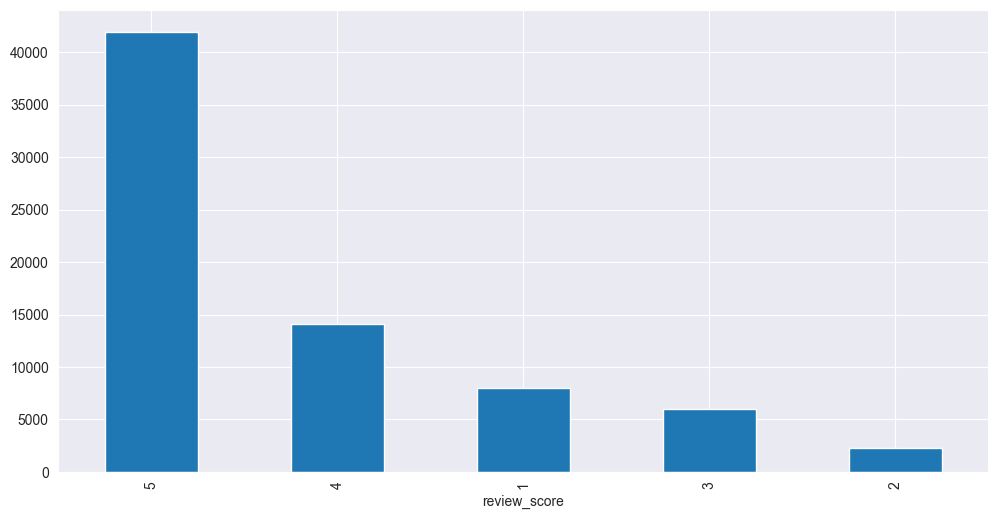

In [391]:
plt.figure(figsize=(12, 6))
df_subset['review_score'].value_counts().plot(kind='bar')
plt.show()




The distribution is skewed
to
the
right.Over
50 % of
the
ratings
are
5, followed
by
a
little
below
20 %
with 4 star ratings.And the percentages of ratings keep going down until below 10 %of the ratings are 2 stars.


In [392]:
df_subset.shape

(72344, 27)

In [393]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', df_subset['customer_unique_id'].nunique())
print('Number of unique Orders in Raw data = ', df_subset['customer_id'].nunique())
print('Number of unique Products in Raw data = ', df_subset['product_id'].nunique())
print('Number of valid reviews: ', df_subset[df_subset['review_score'] != 0].shape[0])

Number of unique USERS in Raw data =  66738
Number of unique Orders in Raw data =  68502
Number of unique Products in Raw data =  15000
Number of valid reviews:  72344


In [394]:
df_subset[df_subset.duplicated()].shape

(444, 27)

Drop duplicated rows

In [395]:
df_subset.drop_duplicates(inplace=True)

In [396]:
df_subset.shape

(71900, 27)

In [397]:

review_prod = df_subset.groupby(['customer_unique_id', 'product_id']).agg(mean_rating=('review_score', 'mean')).reset_index()
print('Total number of unique product orders: ', review_prod.shape[0])
print('Number of reviews:', review_prod[review_prod['mean_rating'] > 0].shape[0])


Total number of unique product orders:  68201
Number of reviews: 68201


In [398]:
# Top 10 users based on rating
most_rated = df_subset.groupby('customer_unique_id').size().sort_values(ascending=False)[:10]
most_rated


customer_unique_id
8af7ac63b2efbcbd88e5b11505e8098a    25
f9ae226291893fda10af7965268fb7f6    23
569aa12b73b5f7edeaa6f2a01603e381    22
1d2435aa3b858d45c707c9fc25e18779    21
2524dcec233c3766f2c2b22f69fd65f4    19
24f12460aad399ba18f4ed2c2fbab65d    17
90807fdb59eec2152bc977feeb6e47e7    16
9a736b248f67d166d2fbb006bcb877c3    14
aae867e923db95a5af878ffec19ebd8c    12
096e351116755fe4c3c1e48eaf301a41    12
dtype: int64

In [399]:

counts = df_subset['customer_unique_id'].value_counts()
df_final = df_subset[df_subset['customer_unique_id'].isin(counts[counts >= 4].index)]
df_final.shape

(1352, 27)

In [400]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['customer_unique_id'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['product_id'].nunique())

The number of observations in the final data = 1352
Number of unique USERS in the final data =  247
Number of unique PRODUCTS in the final data =  414


In [401]:
# Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0

# Aggregate the review scores for duplicate entries
# using the mean as an example. Other aggregation methods can be used as needed.
final_ratings_matrix = df_final.groupby(['customer_unique_id', 'product_id'])['review_score'].mean().unstack(fill_value=0)


print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

# Finding the number of non-zero entries in the interaction matrix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

# Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

# Density of ratings
density = (given_num_of_ratings / possible_num_of_ratings)
density *= 100
print('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (247, 414)
given_num_of_ratings =  449
possible_num_of_ratings =  102258
density: 0.44%


product_id,00905d58c87afcbce21420b3712cacaa,00baba5b58e274d0332a0c8a0a66f877,0152f69b6cf919bcdaf117aa8c43e5a2,02a99f266fc960423c1186ecbd627804,0449db5eede617c5fd413071d582f038,0521fe3eb04940304b489d0fb49a37dd,052413504e5295cd66ec4ced0b310062,053c1c7045cfb67d04d8c5a8dc9fc054,066bbc3a1363adc4d73e093aefd9363a,06ce9c3e61c7a07f872f8317a7dc534d,...,f9be8e0e5acd947d8f49dbc390b9ab20,f9f899bf492ac59cf645a6c93eb91e05,fa38811cc82d393bddb9ad0b9ad96e2a,fb060ad9a8625b626189641799bccf89,fb783e3e545937820b57fe539b2c5a6c,fb98e86cfbfbff699907f0a84784d474,fc2053a22dde0b067898ea436a86ec6e,fca62108387e25005784da2f551466a1,fcad6e5643f855de4b616a24e6dd25e4,fecf6223a3494f35362f670e571d2a04
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
00a9fd000ff87bb48b989df819c418f5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00face5c8f7dbb7eefd4112722f26903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0334ba9c67b6f75abf243ebfcc46de6b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
072a543c663f0b54b41af8b074162d62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
075c65074dbbe8cc9fc87132c5e452b0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [402]:

final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()

product_id,00905d58c87afcbce21420b3712cacaa,00baba5b58e274d0332a0c8a0a66f877,0152f69b6cf919bcdaf117aa8c43e5a2,02a99f266fc960423c1186ecbd627804,0449db5eede617c5fd413071d582f038,0521fe3eb04940304b489d0fb49a37dd,052413504e5295cd66ec4ced0b310062,053c1c7045cfb67d04d8c5a8dc9fc054,066bbc3a1363adc4d73e093aefd9363a,06ce9c3e61c7a07f872f8317a7dc534d,...,f9be8e0e5acd947d8f49dbc390b9ab20,f9f899bf492ac59cf645a6c93eb91e05,fa38811cc82d393bddb9ad0b9ad96e2a,fb060ad9a8625b626189641799bccf89,fb783e3e545937820b57fe539b2c5a6c,fb98e86cfbfbff699907f0a84784d474,fc2053a22dde0b067898ea436a86ec6e,fca62108387e25005784da2f551466a1,fcad6e5643f855de4b616a24e6dd25e4,fecf6223a3494f35362f670e571d2a04
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [403]:

#!pip install scikit-learn
from sklearn.metrics.pairwise import cosine_similarity

In [404]:

# defining a function to get similar users
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows

        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])

        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list

    #Remove the original user and its similarity score and keep only other similar users
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])

    return most_similar_users, similarity_score

Finding out top 10 similar users to the user index 100 and their similarity score

In [405]:
similar = similar_users(100,final_ratings_matrix)[0][0:10]
similar

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [406]:
#Print the similarity score
similar_users(100,final_ratings_matrix)[1][0:10]

[array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]])]

Finding out top 10 similar users to the user index 300 and their similarity score

In [407]:

similar = similar_users(200, final_ratings_matrix)[0][0:10]
similar

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [408]:

#Print the similarity score
similar_users(100,final_ratings_matrix)[1][0:10]

[array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]])]

In [409]:

# defining the recommendations function to get recommendations by using the similar users' preferences
def recommendations(user_index, num_of_products, interactions_matrix):

    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index, interactions_matrix)[0]

    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []

    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:

            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break

    return recommendations[:num_of_products]

In [410]:
recommendations(3,5,final_ratings_matrix)

['8f79239910bb0bf15488ef9abd9e6593',
 '380db7678ce8fd2e3c80de130bc32fbd',
 'c8f57335e06d8d4e73e34057dc92cfbe',
 '2330fe9b304af24209631c7197203c61',
 '12760bcacfaaf1457bc36e601e26dc79']

In [411]:

recommendations(100,5,final_ratings_matrix)

['8f79239910bb0bf15488ef9abd9e6593',
 '380db7678ce8fd2e3c80de130bc32fbd',
 'c8f57335e06d8d4e73e34057dc92cfbe',
 '9e5f752e9e19cd6887063f004ee0da55',
 '2330fe9b304af24209631c7197203c61']

### Model-based Collaborative Filtering

In [412]:
from scipy.sparse import csr_matrix
final_ratings_sparse = csr_matrix(final_ratings_matrix.values)

In [413]:
final_ratings_sparse

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 449 stored elements and shape (247, 414)>

In [414]:
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

from scipy.sparse.linalg import svds # for sparse matrices

In [415]:
# Singular Value Decomposition
U, s, Vt = svds(final_ratings_sparse, k = 50) # here k is the number of latent features

# Construct diagonal array in SVD
sigma = np.diag(s)

In [416]:
U.shape

(247, 50)

In [417]:
sigma.shape

(50, 50)

In [418]:
Vt.shape

(50, 414)

In [419]:

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Predicted ratings
preds_df = pd.DataFrame(abs(all_user_predicted_ratings), columns = final_ratings_matrix.columns)
preds_df.head()
preds_matrix = csr_matrix(preds_df.values)

In [420]:

import numpy as np

def recommend_items(user_index, interactions_matrix, preds_matrix, num_recommendations):

    # Get the user's ratings from the actual and predicted interaction matrices
    user_ratings = interactions_matrix[user_index,:].toarray().reshape(-1)
    user_predictions = preds_matrix[user_index,:].toarray().reshape(-1)

    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.DataFrame({'user_ratings': user_ratings, 'user_predictions': user_predictions})
    temp['Recommended Products'] = np.arange(len(user_ratings))
    temp = temp.set_index('Recommended Products')

    #Filtering the dataframe where actual ratings are 0 which implies that the user has not interacted with that product
    temp = temp.loc[temp.user_ratings == 0]

    #Recommending products with top predicted ratings
    temp = temp.sort_values('user_predictions',ascending=False)#Sort the dataframe by user_predictions in descending order
    print('\nBelow are the recommended products for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))


In [421]:

#Enter 'user index' and 'num_recommendations' for the user
recommend_items(100,final_ratings_sparse,preds_matrix,5)


Below are the recommended products for user(user_id = 100):

Recommended Products
17     0.040692
57     0.040692
262    0.027105
129    0.027105
125    0.020102
Name: user_predictions, dtype: float64


In [422]:
recommend_items(100,final_ratings_sparse,preds_matrix,10)


Below are the recommended products for user(user_id = 100):

Recommended Products
17     0.040692
57     0.040692
262    0.027105
129    0.027105
125    0.020102
377    0.020102
201    0.019955
59     0.019955
202    0.018560
80     0.016468
Name: user_predictions, dtype: float64


In [423]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()

product_id,00905d58c87afcbce21420b3712cacaa,00baba5b58e274d0332a0c8a0a66f877,0152f69b6cf919bcdaf117aa8c43e5a2,02a99f266fc960423c1186ecbd627804,0449db5eede617c5fd413071d582f038,0521fe3eb04940304b489d0fb49a37dd,052413504e5295cd66ec4ced0b310062,053c1c7045cfb67d04d8c5a8dc9fc054,066bbc3a1363adc4d73e093aefd9363a,06ce9c3e61c7a07f872f8317a7dc534d,...,f9be8e0e5acd947d8f49dbc390b9ab20,f9f899bf492ac59cf645a6c93eb91e05,fa38811cc82d393bddb9ad0b9ad96e2a,fb060ad9a8625b626189641799bccf89,fb783e3e545937820b57fe539b2c5a6c,fb98e86cfbfbff699907f0a84784d474,fc2053a22dde0b067898ea436a86ec6e,fca62108387e25005784da2f551466a1,fcad6e5643f855de4b616a24e6dd25e4,fecf6223a3494f35362f670e571d2a04
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [424]:

average_rating = final_ratings_matrix.mean()
average_rating.head()

product_id
00905d58c87afcbce21420b3712cacaa    0.020243
00baba5b58e274d0332a0c8a0a66f877    0.020243
0152f69b6cf919bcdaf117aa8c43e5a2    0.052632
02a99f266fc960423c1186ecbd627804    0.020243
0449db5eede617c5fd413071d582f038    0.016194
dtype: float64

In [425]:

avg_preds=preds_df.mean()
avg_preds.head()

product_id
00905d58c87afcbce21420b3712cacaa    5.089079e-02
00baba5b58e274d0332a0c8a0a66f877    1.301213e-02
0152f69b6cf919bcdaf117aa8c43e5a2    5.611299e-02
02a99f266fc960423c1186ecbd627804    2.024291e-02
0449db5eede617c5fd413071d582f038    1.554144e-17
dtype: float64

In [426]:

rmse_df = pd.concat([average_rating, avg_preds], axis=1)

rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']

rmse_df.head()


,Avg_actual_ratings,Avg_predicted_ratings
product_id,,
00905d58c87afcbce21420b3712cacaa,0.020243,5.089079e-02
00baba5b58e274d0332a0c8a0a66f877,0.020243,1.301213e-02
0152f69b6cf919bcdaf117aa8c43e5a2,0.052632,5.611299e-02
02a99f266fc960423c1186ecbd627804,0.020243,2.024291e-02
0449db5eede617c5fd413071d582f038,0.016194,1.554144e-17


In [427]:
RMSE=mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)
print(f'RMSE SVD Model = {RMSE} \n')

RMSE SVD Model = 0.013997037728046197 



### K-Means Clustering


In [270]:
import sklearn
print('Scikit-Learn version: ', sklearn.__version__)

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans

Scikit-Learn version:  1.5.2


In [274]:
class elbowMethod():
    def __init__(self, sparseMatrix):
        self.sparseMatrix = sparseMatrix
        self.wcss = list()
        self.differences = list()
    def run(self, init, upto, max_iterations = 300):
        for i in range(init, upto + 1):
            kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = max_iterations, n_init = 10, random_state = 0)
            kmeans.fit(self.sparseMatrix)
            self.wcss.append(kmeans.inertia_)
        self.differences = list()
        for i in range(len(self.wcss)-1):
            self.differences.append(self.wcss[i] - self.wcss[i+1])
    def showPlot(self, boundary = 500, upto_cluster = None):
        if upto_cluster is None:
            WCSS = self.wcss
            DIFF = self.differences
        else:
            WCSS = self.wcss[:upto_cluster]
            DIFF = self.differences[:upto_cluster - 1]
        plt.figure(figsize=(15, 6))
        plt.subplot(121).set_title('Elbow Method Graph')
        plt.plot(range(1, len(WCSS) + 1), WCSS)
        plt.grid(b = True)
        plt.subplot(122).set_title('Differences in Each Two Consective Clusters')
        len_differences = len(DIFF)
        X_differences = range(1, len_differences + 1)
        plt.plot(X_differences, DIFF)
        plt.plot(X_differences, np.ones(len_differences)*boundary, 'r')
        plt.plot(X_differences, np.ones(len_differences)*(-boundary), 'r')
        plt.grid()
        plt.show()

In [275]:
elbow_method = elbowMethod(final_ratings_matrix) 

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

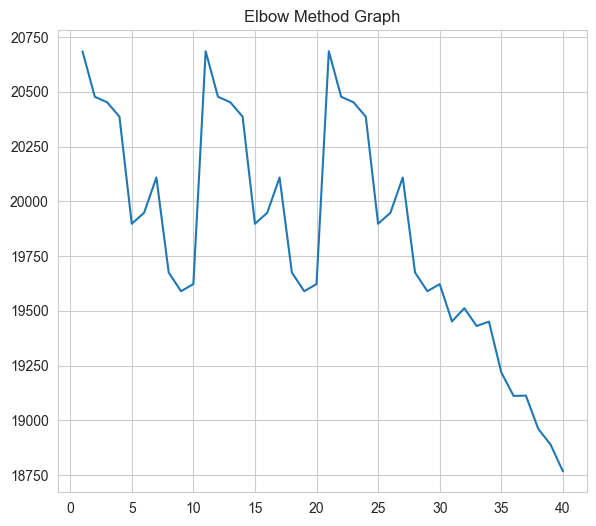

In [278]:
elbow_method.run(1, 20)
elbow_method.showPlot(boundary = 20)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

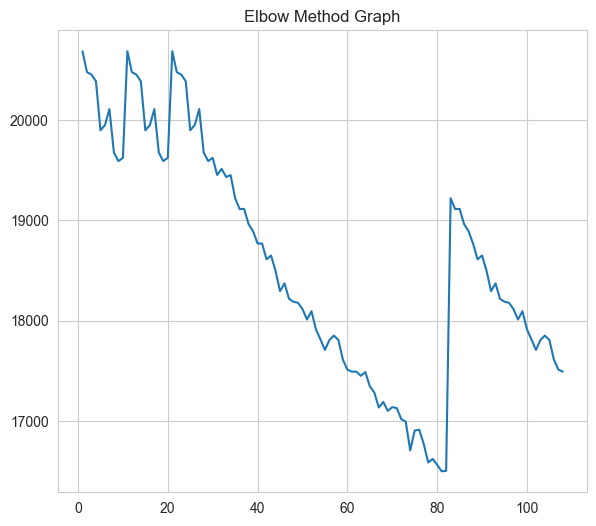

In [281]:
elbow_method.run(15, 40)
elbow_method.showPlot(boundary = 20)

In [284]:
kmeans = KMeans(n_clusters=30, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(final_ratings_matrix)